In [4]:
import numpy as np
import pandas as pd
import numpy as np
import cv2
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [5]:
import pathlib
link='data\ArASL_Database_54K_Final'
data_dir=pathlib.Path(link)
data_dir

WindowsPath('data/ArASL_Database_54K_Final')

In [6]:
def laod_images_opencv_extisions(path):
    ext = [".jpg",".gif",".png",".tga",".webp",'.jpeg']   # Add image formats here
    files = []
    images = []
    [files.extend(data_dir.glob(path + '/*' + e)) for e in ext]
    return files

In [7]:
for i in os.walk(link):
    print(i[0])

data\ArASL_Database_54K_Final
data\ArASL_Database_54K_Final\ain
data\ArASL_Database_54K_Final\al
data\ArASL_Database_54K_Final\aleff
data\ArASL_Database_54K_Final\bb
data\ArASL_Database_54K_Final\dal
data\ArASL_Database_54K_Final\dha
data\ArASL_Database_54K_Final\dhad
data\ArASL_Database_54K_Final\fa
data\ArASL_Database_54K_Final\gaaf
data\ArASL_Database_54K_Final\ghain
data\ArASL_Database_54K_Final\ha
data\ArASL_Database_54K_Final\haa
data\ArASL_Database_54K_Final\jeem
data\ArASL_Database_54K_Final\kaaf
data\ArASL_Database_54K_Final\khaa
data\ArASL_Database_54K_Final\la
data\ArASL_Database_54K_Final\laam
data\ArASL_Database_54K_Final\meem
data\ArASL_Database_54K_Final\nun
data\ArASL_Database_54K_Final\ra
data\ArASL_Database_54K_Final\saad
data\ArASL_Database_54K_Final\seen
data\ArASL_Database_54K_Final\sheen
data\ArASL_Database_54K_Final\ta
data\ArASL_Database_54K_Final\taa
data\ArASL_Database_54K_Final\thaa
data\ArASL_Database_54K_Final\thal
data\ArASL_Database_54K_Final\toot
data\Ar

In [8]:

classes= [i.split('\\')[-1] for i in [x[0] for x in os.walk(link)][1:]]
classes

['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']

In [9]:
len(classes)

32

In [10]:
image_dir={}
for i in classes:
    image_dir[i]=laod_images_opencv_extisions(i)
image_dir[classes[0]][:5]

[WindowsPath('data/ArASL_Database_54K_Final/ain/AIN (1).JPG'),
 WindowsPath('data/ArASL_Database_54K_Final/ain/AIN (10).JPG'),
 WindowsPath('data/ArASL_Database_54K_Final/ain/AIN (100).jpg'),
 WindowsPath('data/ArASL_Database_54K_Final/ain/AIN (1000).JPG'),
 WindowsPath('data/ArASL_Database_54K_Final/ain/AIN (1001).JPG')]

In [11]:
image_dir.keys()

dict_keys(['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay'])

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dataFrame=pd.DataFrame()

x,y=[],[]

for imageName, imagePaths in image_dir.items():
    for img in imagePaths:

        x.append(img)
        y.append(imageName)
        
dataFrame['filename']=x
dataFrame['category']=y



dataFrame['category'] = dataFrame['category']
le=LabelEncoder()
dataFrame['category']=le.fit_transform(dataFrame['category'])
dataFrame['category'] = dataFrame['category'].astype('string')
dataFrame['filename'] = dataFrame['filename'].astype('string')
dataFrame=dataFrame.sample(frac=1)
#dataFrame= dataFrame.reset_index()


In [13]:
dataFrame.head()

,filename,category
47307,data\ArASL_Database_54K_Final\toot\TOOT (1727)...,27
25063,data\ArASL_Database_54K_Final\khaa\KHAA (484).JPG,14
27984,data\ArASL_Database_54K_Final\laam\LAAM (1541)...,16
53200,data\ArASL_Database_54K_Final\zay\ZAY (234).jpg,31
53316,data\ArASL_Database_54K_Final\zay\ZAY (339).JPG,31


In [14]:
dataFrame.category.unique(

)

<StringArray>
['27', '14', '16', '31', '10', '20',  '6', '19',  '9',  '2', '25', '22', '28',
  '3',  '7', '17', '24', '23', '21', '13',  '1', '12', '30',  '4', '11', '29',
  '8',  '0', '18', '26',  '5', '15']
Length: 32, dtype: string

In [15]:
le.inverse_transform([1])[0]

'al'

In [16]:

from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(dataFrame,test_size=.2,random_state=10)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [17]:
total_train,total_validate

(43239, 10810)

In [18]:
34174//64


533

In [19]:
image_size = 64
input_shape = (image_size, image_size, 3)

batch_size = 64

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(

    rescale=1./255,

)

train_generator = train_datagen.flow_from_dataframe(
    train_df,

    x_col='filename',
    y_col='category',

    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 43239 validated image filenames belonging to 32 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,

    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)


Found 10810 validated image filenames belonging to 32 classes.


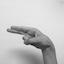

In [22]:
import PIL
PIL.Image.open(str(dataFrame['filename'][1]))

Found 16 validated image filenames belonging to 12 classes.


C:\Users\mahmo\AppData\Local\Temp\ipykernel_18356\1365554302.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


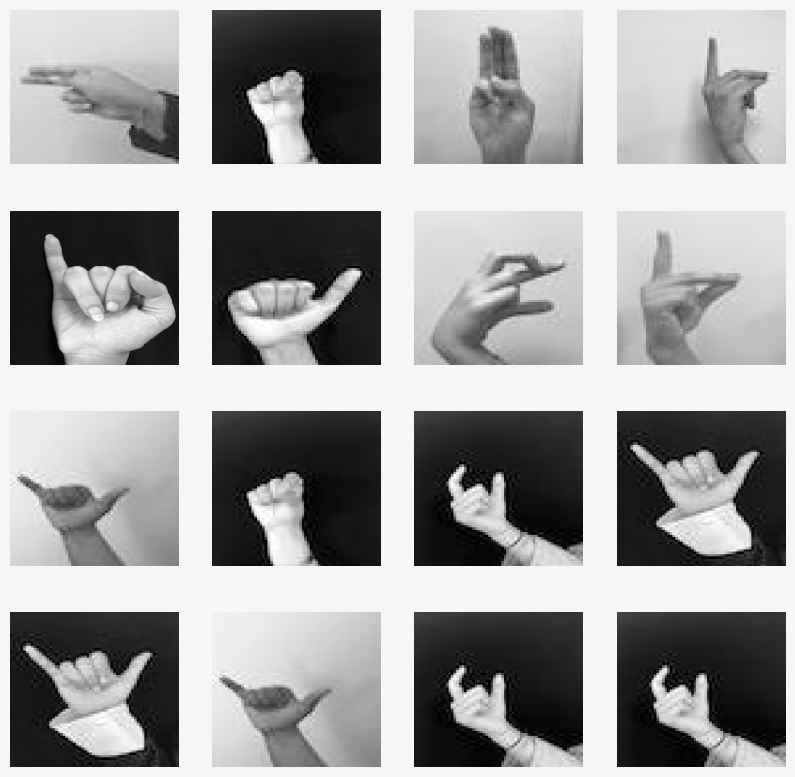

In [23]:
import matplotlib.pyplot as plt
def data_argumentation_show(n, grid_size):

    sample_data = train_datagen.flow_from_dataframe(
            (train_df.sample(n)),
            x_col = 'filename',
            y_col = 'category',
            target_size = (224, 244),
            class_mode = 'categorical')

  #subplot grid
    fig = plt.figure(figsize = (10,10))
    fig.patch.set_facecolor('#f5f6f6')
    for i in range(0,grid_size*grid_size):
        plt.subplot(grid_size,grid_size, i+1)
        for x,y in sample_data:
            img = x[0]
            plt.imshow(img)
            plt.axis('off')
            break
            plt.tight_layout()
            del img
    fig.show()
data_argumentation_show(16,4)


# Modeling

In [24]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras import applications
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.efficientnet import EfficientNetB3

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

def myCallbacks(weights_name):
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=5,
        verbose=1,
        factor=0.2,
        min_lr=0.001,
        )

    model_cp=ModelCheckpoint(
        filepath=str(weights_name)+".h5",
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
    callbacks = [model_cp, learning_rate_reduction]
    return callbacks

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax

In [36]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load MobileNetV2 with ImageNet weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base model
# for layer in base_model.layers[:50]:
#     layer.trainable = False
for layer in base_model.layers[:]:
    layer.trainable = True


# Add your own classification layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)  # Adjust for your number of classes (22 in your case)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [31]:
len(base_model.layers)

154

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])
model.compile(optimizer = 'adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.compile(optimizer = 'adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.load_weights("model.h5")

In [39]:
model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=myCallbacks('model'),
)

Epoch 1/50
675/675 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9496
Epoch 1: val_accuracy improved from -inf to 0.93945, saving model to model.h5


c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


675/675 [==============================] - 1656s 2s/step - loss: 0.2236 - accuracy: 0.9496 - val_loss: 0.2519 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 2/50
675/675 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9816
Epoch 2: val_accuracy improved from 0.93945 to 0.95508, saving model to model.h5
675/675 [==============================] - 478s 709ms/step - loss: 0.0757 - accuracy: 0.9816 - val_loss: 0.1590 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 3/50
675/675 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9831
Epoch 3: val_accuracy did not improve from 0.95508
675/675 [==============================] - 484s 717ms/step - loss: 0.0656 - accuracy: 0.9831 - val_loss: 0.2275 - val_accuracy: 0.9480 - lr: 0.0010
Epoch 4/50
675/675 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9861
Epoch 4: val_accuracy improved from 0.95508 to 0.97387, saving model to model.h5
675/675 [==============================] - 486s 721ms/ste

ResourceExhaustedError: Graph execution error:

Detected at node 'model_2/block_10_expand_BN/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mahmo\AppData\Local\Temp\ipykernel_18356\3272591416.py", line 1, in <module>
      model.fit(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 597, in call
      outputs = self._fused_batch_norm(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 990, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 964, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_2/block_10_expand_BN/FusedBatchNormV3'
OOM when allocating tensor with shape[64,4,4,384] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_2/block_10_expand_BN/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_47510]

In [40]:
model.save_weights("mdoel33.h5")

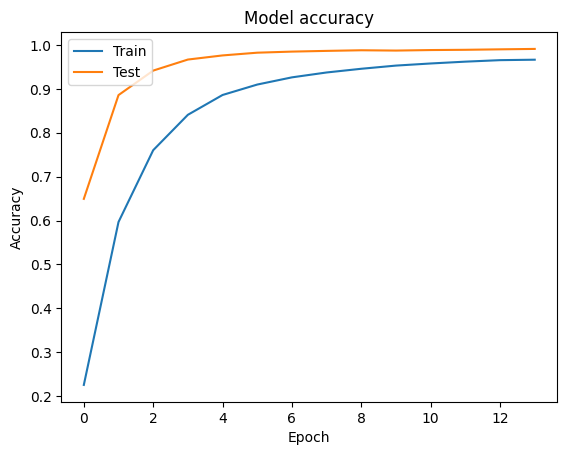

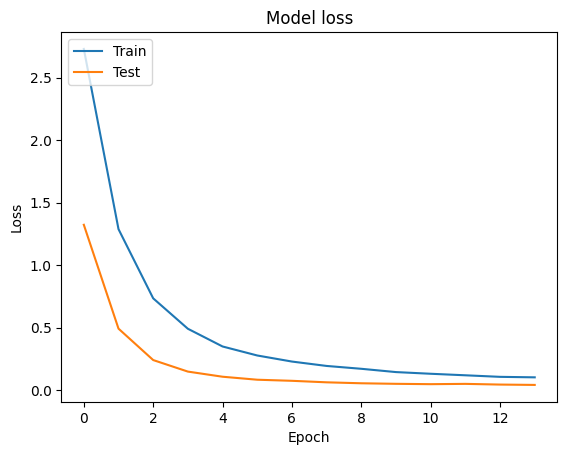

In [33]:
# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
import joblib
joblib.dump(le,'labels')

['labels']

In [ ]:
{
    0: 'ع',
    1: 'ال',
    2: '',
    3: '',
    4: '',
    5: '',
    6: '',
    7: '',
    8: '',
    9: '',
    10: '',
    11: '',
    12: 'أ',
    13: '',
    14: '',
    15: '',
    16: '',
    17: '',
    18: '',
    19: '',
    20: '',
    21: '',
    22: '',
    23: 'ب',
    24: '',
    25: '',
}
